In [69]:
import numpy as np
import healpy as hp
import pandas as pd
import matplotlib.pyplot as plt
import tools
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from math import pi
from pixell import enmap, curvedsky

In [66]:
ellmax=7000
ells = np.arange(0, ellmax+1, 1)
ellmin = 200

# write WebSky alm

In [46]:
if 0:
    ksz_lt_alm = hp.map2alm(hp.read_map('./maps/websky/ksz.fits'), lmax=ellmax)
    hp.write_alm('./maps/websky/ksz_lt_alm.fits', ksz_lt_alm)

    ksz_ri_alm = hp.map2alm(hp.read_map('./maps/websky/ksz_patchy.fits'),lmax=ellmax)
    hp.write_alm('./maps/websky/ksz_ri_alm.fits', ksz_ri_alm)
    
    kap_alm = hp.map2alm(hp.read_map('./maps/websky/kap.fits'), lmax=ellmax)
    hp.write_alm('./maps/websky/kap_alm.fits', kap_alm)

# write Sehgal alm

In [80]:
if 0:
    ksz_lt_alm = hp.map2alm(hp.read_map('./maps/sehgal/148_ksz_healpix_nopell_Nside4096_DeltaT_uK.fits'), lmax=ellmax)
    hp.write_alm('./maps/sehgal/ksz_lt_alm.fits', ksz_lt_alm)

    kap_alm = hp.map2alm(hp.read_map('./maps/sehgal/healpix_4096_KappaeffLSStoCMBfullsky.fits'), lmax=ellmax)
    hp.write_alm('./maps/sehgal/kap_alm.fits', kap_alm)

# check WebSky and Sehgal kSZ auto_cl and cross_cl

In [82]:
# websky
ksz_alm_lt = hp.read_alm('./maps/websky/ksz_lt_alm.fits')
ksz_alm_ri = hp.read_alm('./maps/websky/ksz_ri_alm.fits')
ksz_cl_lt = hp.alm2cl(ksz_alm_lt, lmax=ellmax)
ksz_cl_ri = hp.alm2cl(ksz_alm_ri, lmax=ellmax)

# sehgal
ksz_alm_lt_s = hp.read_alm('./maps/sehgal/ksz_lt_alm.fits')
ksz_cl_lt_s = hp.alm2cl(ksz_alm_lt_s, lmax=ellmax)

In [104]:
lensed_alm = hp.read_alm('./maps/websky/lensed_alm.fits')
lensed_cl = hp.alm2cl(lensed_alm, lmax=ellmax)

Text(0.5, 0, '$\\ell$')

Text(0, 0.5, '$\\ell(\\ell+1)/(2\\pi)C^{TT}_{\\ell} [\\mu K^2]$')

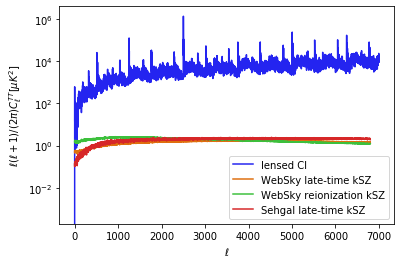

In [105]:
factor = ells*(ells+1)/(2*pi)
plt.plot((factor*lensed_cl), label='lensed Cl')
plt.plot((factor*ksz_cl_lt)[ellmin:], label='WebSky late-time kSZ')
plt.plot((factor*ksz_cl_ri)[ellmin:], label='WebSky reionization kSZ')
plt.plot((factor*ksz_cl_lt_s)[ellmin:], label='Sehgal late-time kSZ')

plt.legend()
plt.yscale('log')
plt.xlabel('$\ell$')
plt.ylabel(r'$\ell(\ell+1)/(2\pi)C^{TT}_{\ell} [\mu K^2]$')
if 0:
    plt.savefig('./output/draft_plot/ps.pdf')
    plt.savefig('./output/draft_plot/ps.png')

# check WebSky and Sehgal kSZ cross_cl

In [100]:
if 0:
    ksz_lt_alm2 = hp.map2alm(hp.read_map('./maps/websky/ksz.fits')**2, lmax=ellmax)
    hp.write_alm('./maps/websky/ksz_lt_alm2.fits', ksz_lt_alm2)
    
    ksz_lt_alm2_s = hp.map2alm(hp.read_map('./maps/sehgal/148_ksz_healpix_nopell_Nside4096_DeltaT_uK.fits')**2, lmax=ellmax)
    hp.write_alm('./maps/sehgal/ksz_lt_alm2.fits', ksz_lt_alm2_s)

In [101]:
# websky cross ps
ksz_lt_alm2 = hp.read_alm('./maps/websky/ksz_lt_alm2.fits')
kap_alm = hp.read_alm('./maps/websky/kap_alm.fits')
cross_ps = hp.alm2cl(ksz_lt_alm2, kap_alm)

# sehgal cross ps
ksz_lt_alm2_s = hp.read_alm('./maps/sehgal/ksz_lt_alm2.fits')
kap_alm_s = hp.read_alm('./maps/sehgal/kap_alm.fits')
cross_ps_s = hp.alm2cl(ksz_lt_alm2_s, kap_alm_s)

Text(0.5, 0, '$\\ell$')

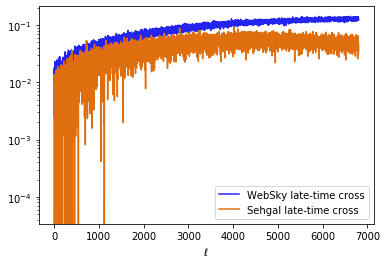

In [102]:
plt.plot((factor*cross_ps)[ellmin:], label='WebSky late-time cross')
plt.plot((factor*cross_ps_s)[ellmin:], label='Sehgal late-time cross')
plt.legend()
plt.yscale('log')
plt.xlabel('$\ell$')
if 1:
    plt.savefig('./output/draft_plot/cross_ps.pdf')
    plt.savefig('./output/draft_plot/cross_ps.png')    

In [103]:
# bin the curves

In [106]:
type(cross_ps)

numpy.ndarray